In [4]:
import gpytorch
import numpy as np
import pandas as pd
import torch
from datetime import datetime

from bo_functions import ExactGPModel
from bo_functions import create_y_data
from bo_functions import bo_iter
from bo_functions import test_train_split
from bo_functions import bo_iter_w_runs

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

In [7]:
#Set Date and Time
dateTimeObj = datetime.now()
timestampStr = dateTimeObj.strftime("%d-%b-%Y (%H:%M:%S)")
print("Date and Time: ", timestampStr)
# DateTime = dateTimeObj.strftime("%Y/%m/%d/%H-%M-%S%p")
DateTime = None ##For Testing only

#Set Parameters
Theta_True = np.array([1,-1])
BO_iters = 2
train_iter = 300
noise_std = 0.1
runs = 1
explore_bias = torch.tensor([0.75])
t=4
shuffle_seed = 6
set_lengthscale = np.array([None])

emulator = True
sparse_grid = False
verbose = True
save_fig=False

#Pull Experimental data from CSV
exp_data_doc = 'Input_CSVs/Exp_Data/n=5.csv'
exp_data = np.array(pd.read_csv(exp_data_doc, header=0,sep=","))
Xexp = exp_data[:,1]
Yexp = exp_data[:,2]
n = len(Xexp)

#Define GP Testing space
p=20
Theta1 =  np.linspace(-2,2,p) #1x10
Theta2 =  np.linspace(-2,2,p) #1x10
theta_mesh = np.array(np.meshgrid(Theta1, Theta2)) #2 Uniform 5x5 arrays

Date and Time:  22-Jul-2022 (16:09:33)


Runs: 1
BO Iters: 2
------------------------------
Lengthscale Set To: [None]
Explore Bias: 0.75
Run Number:  1


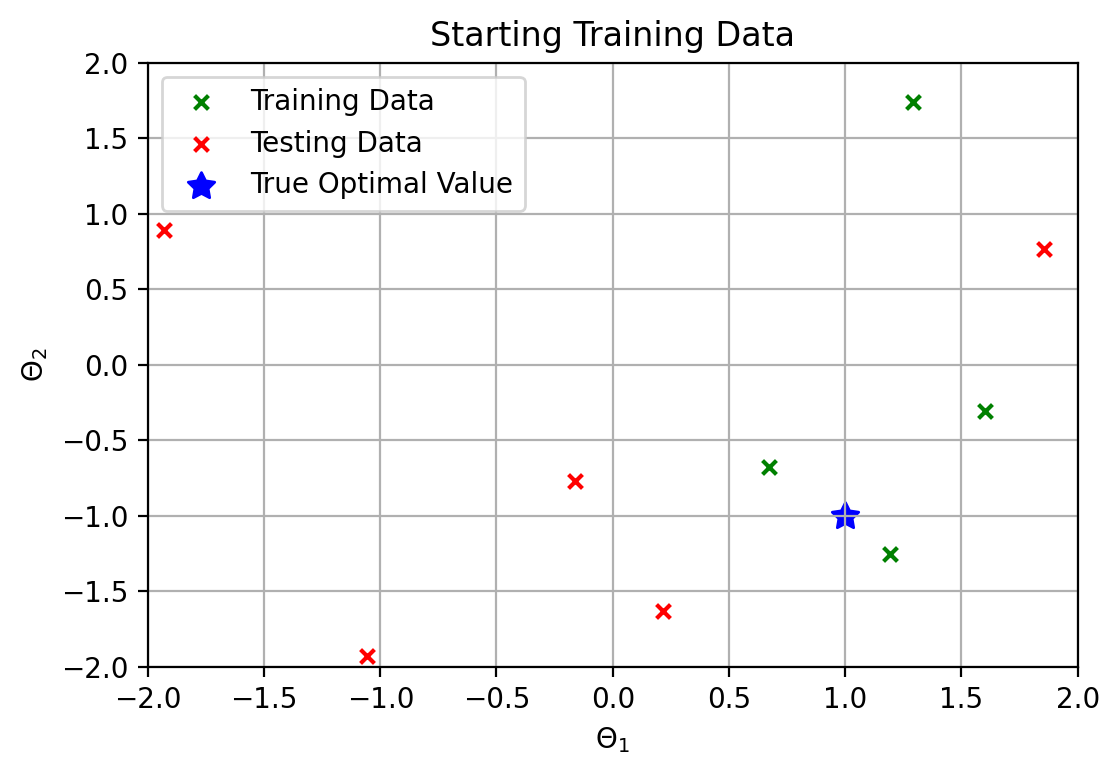

Theta =  [ 0.94736842 -0.94736842]
GP Mean [-6.62547927 -5.1951416  -1.81723251  1.16754294  2.60898814]
GP Stdev [3.33761847 3.52484426 3.60663348 3.30217405 3.37725649]
SSE 0.027617790826063054


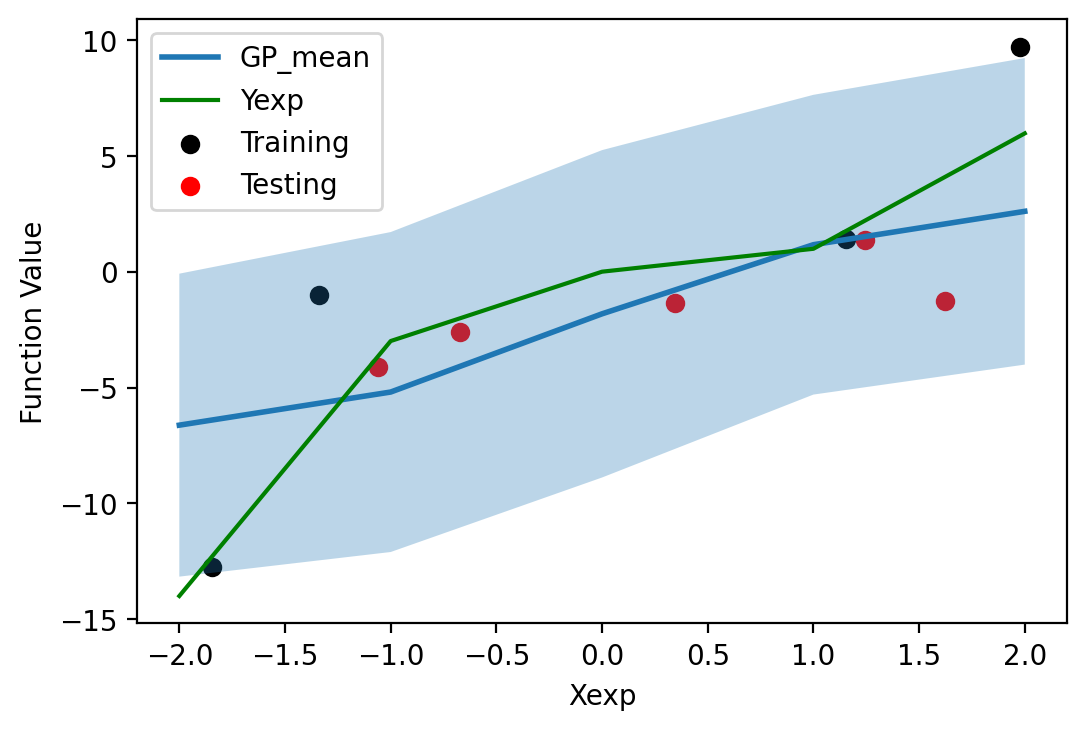

MOV 575.7442481102185
BO Iteration =  1
Jasrasaria EP: 1
Exp EP: 1
Exploration Bias =  tensor(0.7500)
Scipy Theta Best =  [ 1.36842105 -0.52631579]
Argmax Theta Best =  [ 1.36842105 -0.52631579]
Scipy Theta Opt =  [ 1.31840453 -0.96267002]
Argmin Theta_Opt_GP =  [ 1.36842105 -0.94736842] 



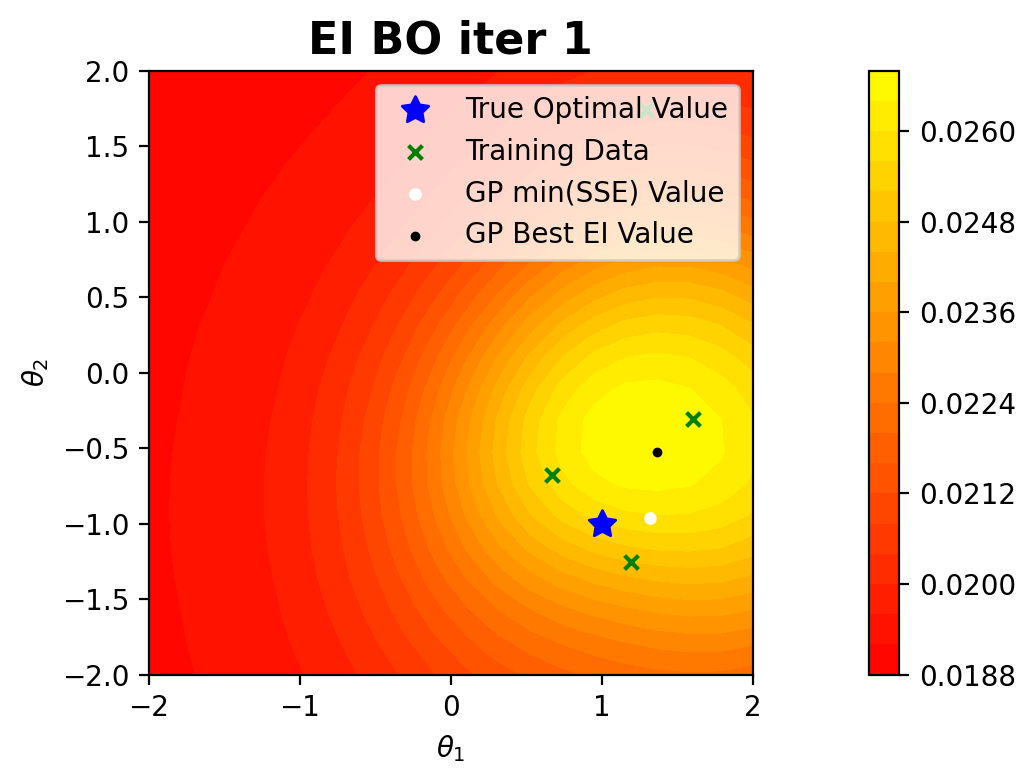

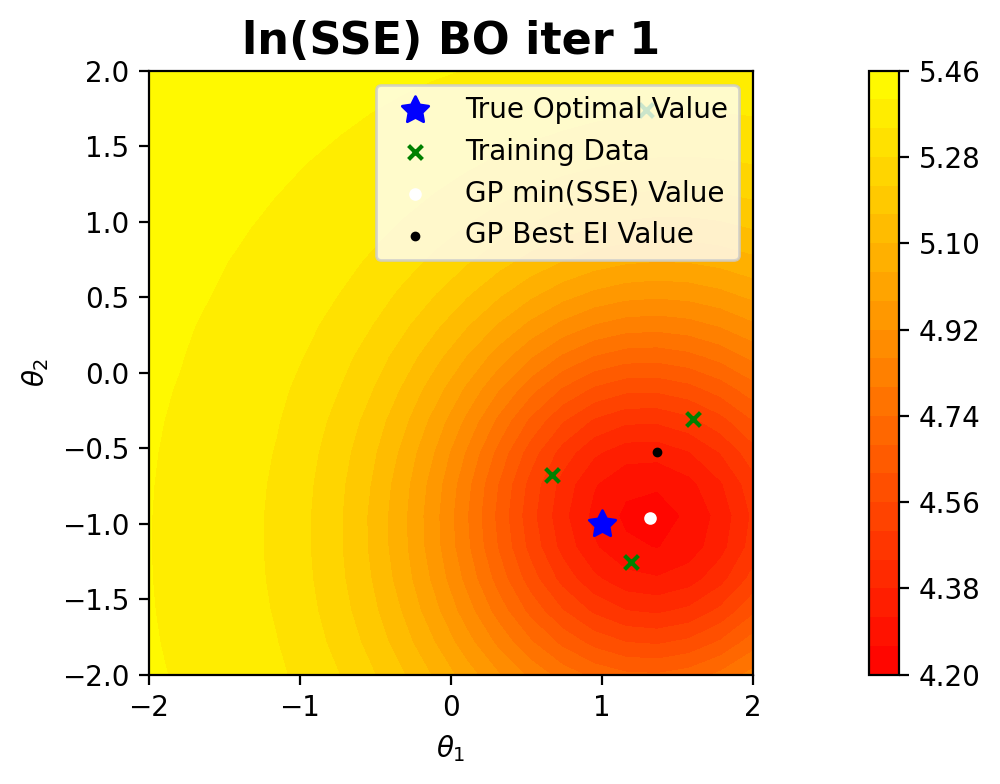

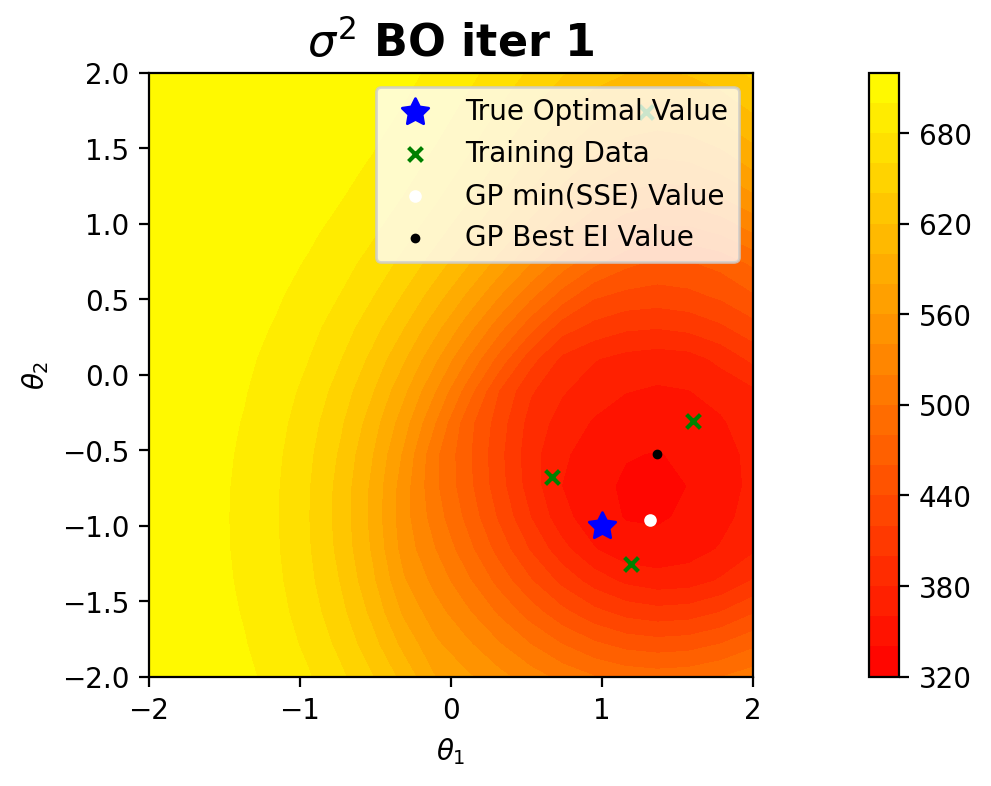

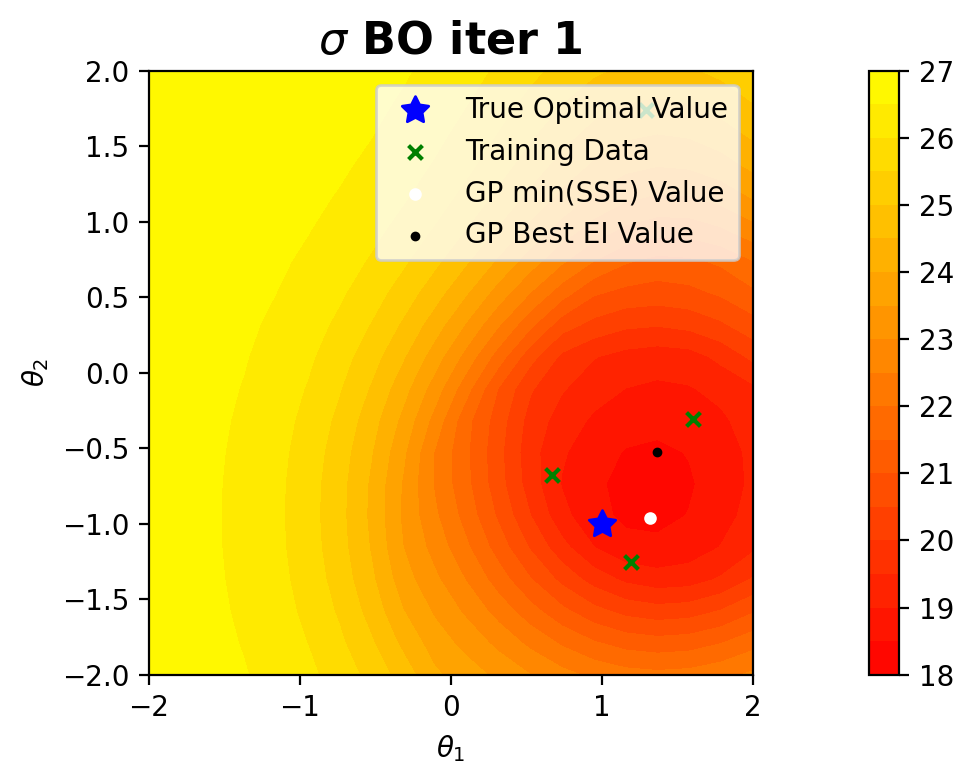

Best Error is: 0.1283
Magnitude of ln(SSE) given Theta_Opt =  [ 1.31840453 -0.96267002] is 1.0302e-01
Theta =  [ 0.94736842 -0.94736842]
GP Mean [-8.68630619 -5.1012657  -1.11490182  1.51273443  3.7737322 ]
GP Stdev [3.05166276 3.14171728 3.18337741 3.02833973 3.1566229 ]
SSE 0.16933327432871367


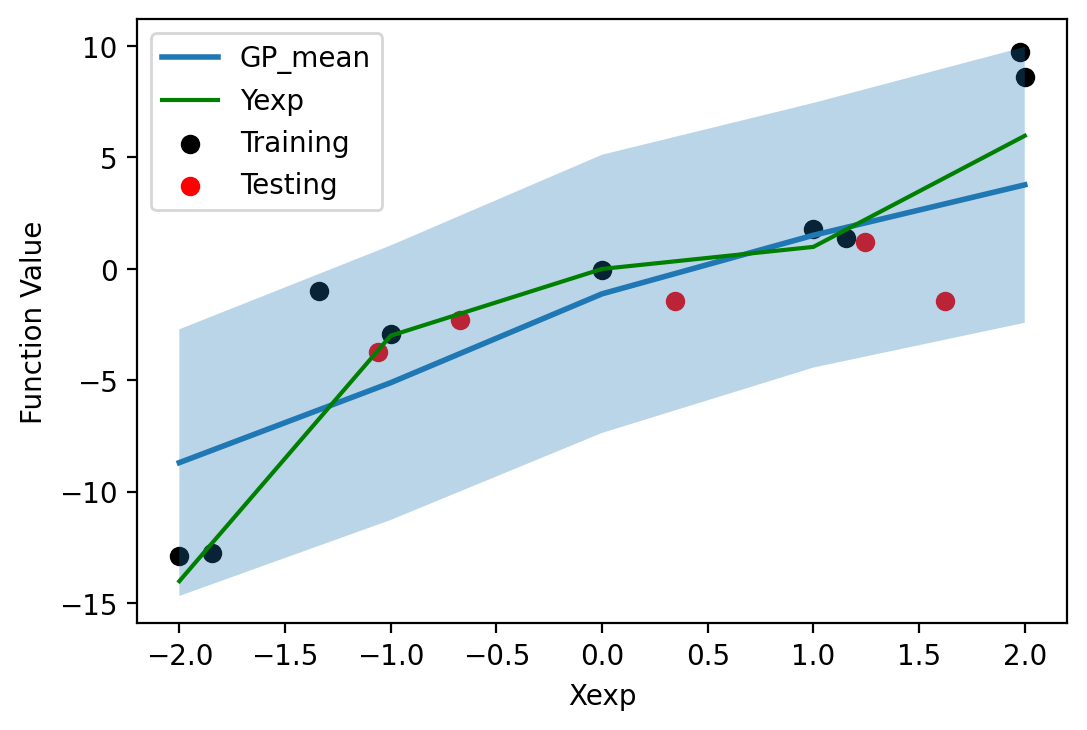

MOV 524.0553618320771
BO Iteration =  2
Jasrasaria EP: 4083.964508101774
Exp EP: 0.8576958985908941
Exploration Bias =  tensor(0.6495)
Scipy Theta Best =  [ 1.15789474 -0.52631579]
Argmax Theta Best =  [ 1.15789474 -0.52631579]
Scipy Theta Opt =  [ 1.30627417 -0.82558367]
Argmin Theta_Opt_GP =  [ 1.36842105 -0.73684211] 



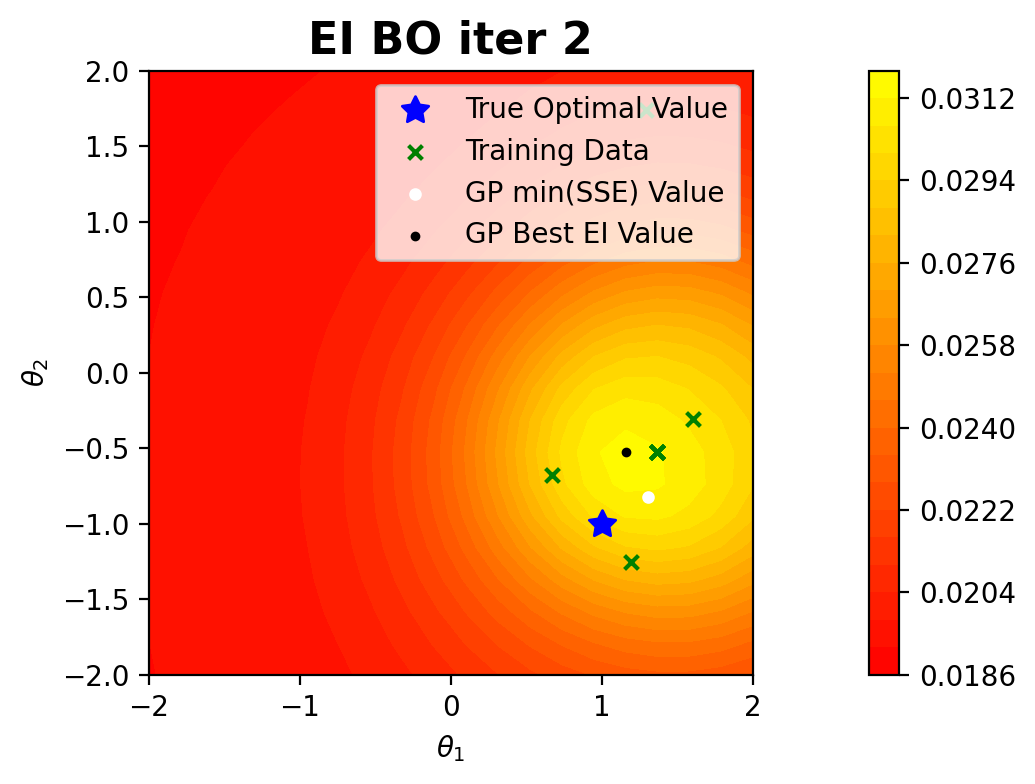

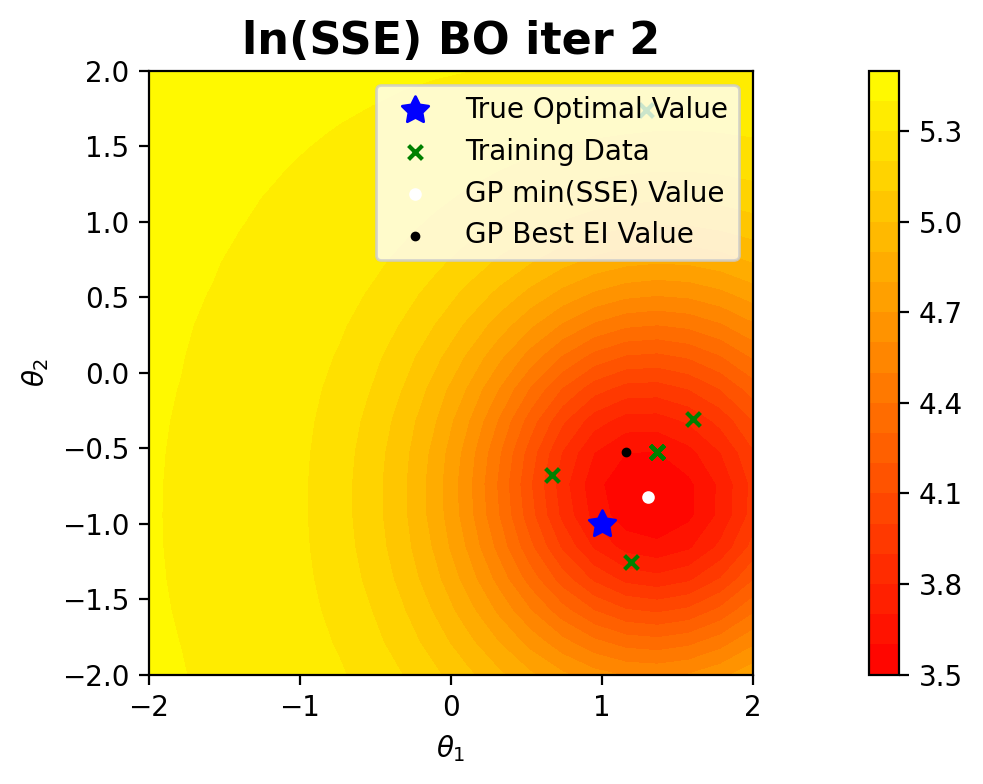

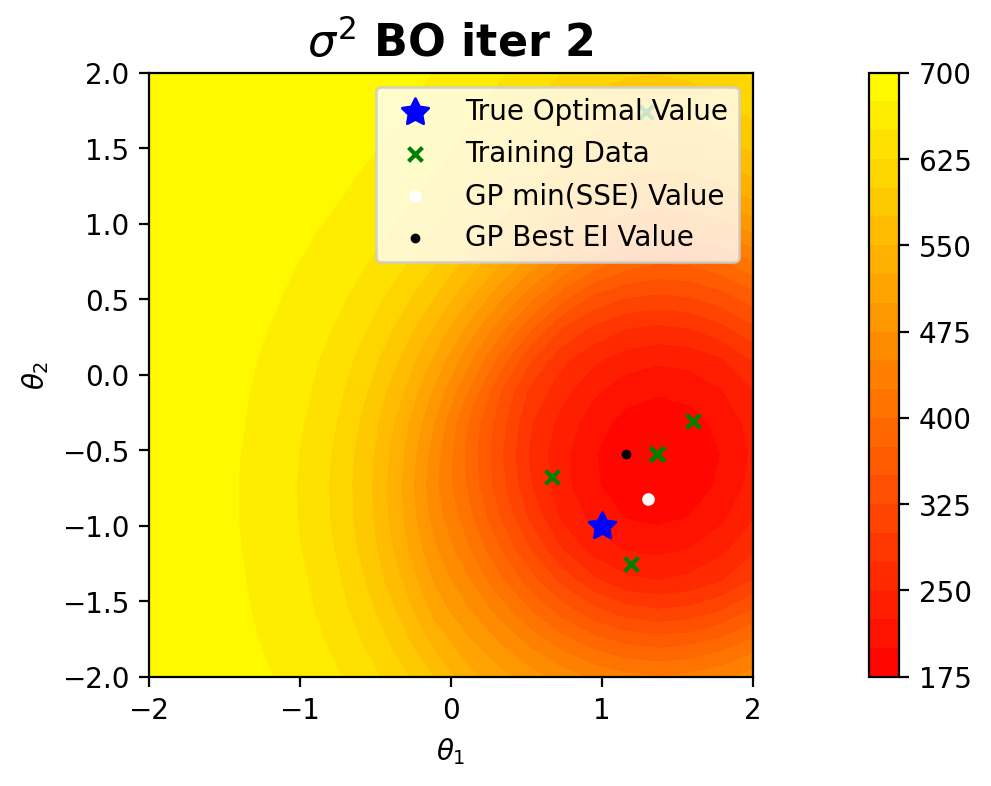

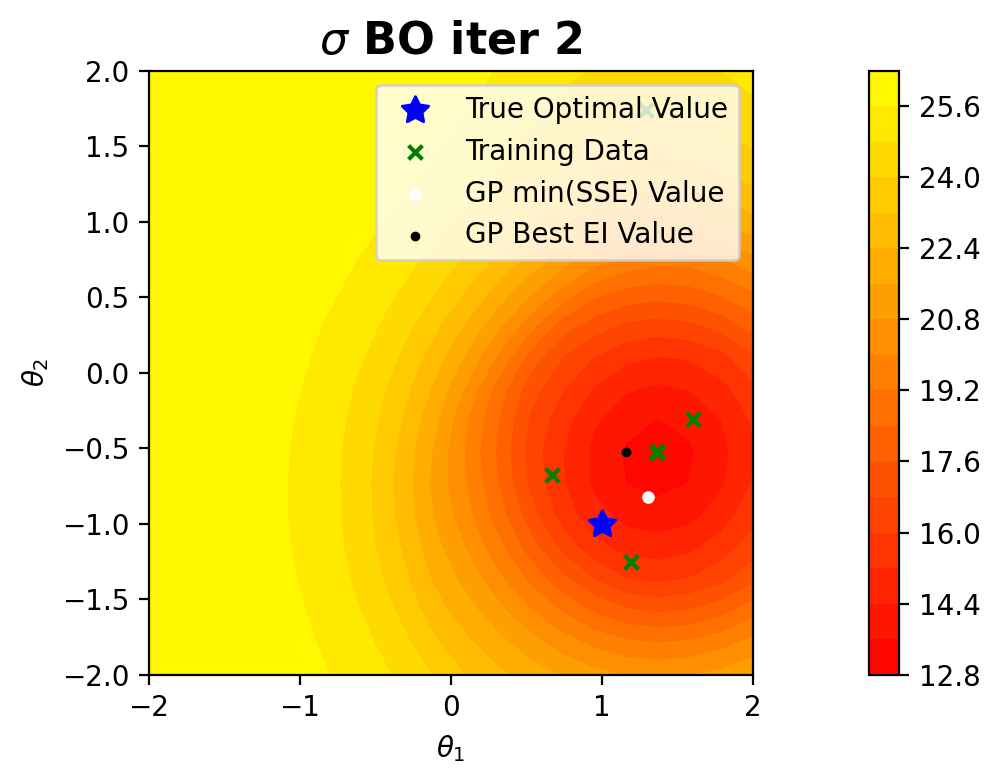

Best Error is: 0.1283
Magnitude of ln(SSE) given Theta_Opt =  [ 1.30627417 -0.82558367] is 7.1754e-01


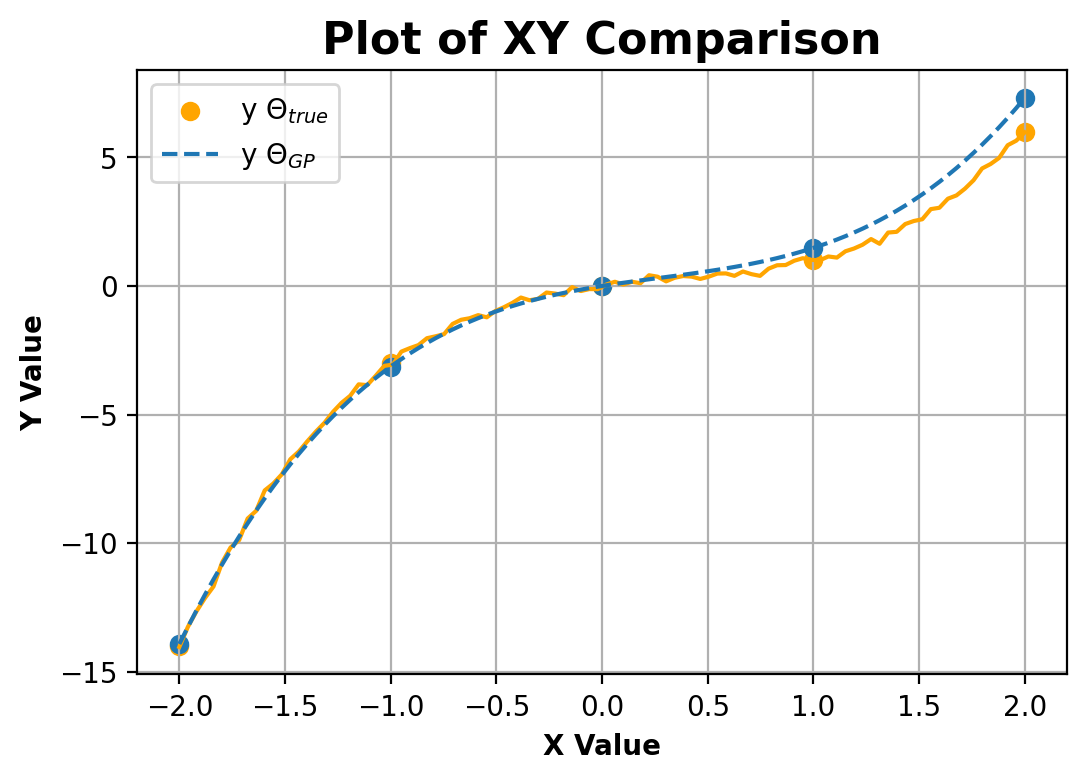

The GP predicts the lowest SSE of 1.109e+00 occurs at θ = [ 1.31840453 -0.96267002] during run 1 at BO iteration 1
At this point, the highest EI occurs at θ = [ 1.36842105 -0.52631579]
CPU times: user 13 s, sys: 56.7 ms, total: 13.1 s
Wall time: 13.1 s


In [8]:
%%time

# sparse_grid = True
obj = "obj"

all_data_doc = "Input_CSVs/Train_Data/all_3_data/t=25.csv"
all_data = np.array(pd.read_csv(all_data_doc, header=0,sep=","))  

print("Runs:", runs)
print("BO Iters:",BO_iters)
print("------------------------------")
for i in range(len(set_lengthscale)):
    for j in range(len(explore_bias)):
        print("Lengthscale Set To:", set_lengthscale)
        print("Explore Bias:", str(np.round(float(explore_bias[j]),3)))
        results = bo_iter_w_runs(BO_iters,all_data_doc,t,theta_mesh,Theta_True,train_iter,explore_bias[j], Xexp, Yexp,
                                     noise_std, obj, runs, sparse_grid, emulator, set_lengthscale[i], verbose, 
                                     save_fig, shuffle_seed, DateTime)
        print("The GP predicts the lowest SSE of", "{:.3e}".format(np.exp(results[3])), "occurs at \u03B8 =", results[2][0], 
                  "during run", results[1], "at BO iteration", results[0])
        print("At this point, the highest EI occurs at \u03B8 =", results[4][0])